In [15]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [30]:
# Normalización de datos
data_entrenamiento = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True
)
data_validacion = ImageDataGenerator(rescale=1./255)

# Directorios relativos
carpeta_entrenamiento = os.path.join('..','..','data', 'entrenamiento')
carpeta_validacion = os.path.join('..','..','data', 'validacion')

# Clasificación de las imágenes en 4 categorías
data_entrenamiento = data_entrenamiento.flow_from_directory(
    carpeta_entrenamiento,
    target_size=(128,128), # Tamaño de las imágenes
    batch_size=64, # Tamaño del lote de procesamiento
    class_mode='categorical' # Clasificación categórica para 4 clases
)

data_validacion = data_validacion.flow_from_directory(
    carpeta_validacion,
    target_size=(128,128), # Tamaño de las imágenes
    batch_size=64, # Tamaño del lote de procesamiento
    class_mode='categorical' # Clasificación categórica para 4 clases
)

Found 36000 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.


In [31]:
# Identificación de las clases
print(data_entrenamiento.class_indices)

{'metal': 0, 'papel_y_carton': 1, 'plastico': 2, 'vidrio': 3}


## Entrenamiento de Modelo 3

### Arquitectura de 7 capas
- Capa 1: Capa de entrada
- Capa 2: Capa de convolución de 32 filtros
- Capa 3: Capa de convolución de 64 filtros
- Capa 4:  Capa de convolución de 128 filtros
- Capa 5: Capa de regularización 1
- Capa 6: Capa densa 1
- Capa 7: Capa de salida

In [32]:
# Definición del modelo de red neuronal convolucional CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)), # Capa de entrada con imágenes de 128x128 píxeles y 3 canales de color
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), # Capa de convolución con 32 filtros de 3x3
    #tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # Capa de convolución con 64 filtros de 3x3
    #tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'), # Capa de convolución con 128 filtros de 3x3
    #tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Flatten(), # Aplanamiento de las características detectadas en un vector unidimensional
    #tf.keras.layers.Dropout(0.5), # Capa de regularización de la red neuronal
    tf.keras.layers.Dense(512, activation='relu'), # Capa densa con 512 neuronas
    tf.keras.layers.Dense(4, activation='softmax') # Capa densa con 4 neuronas (4 clases) y función de activación softmax para clasificación
])

In [33]:
# Compilación del modelo CNN
model.compile(
    optimizer='adam', # Algoritmo de optimización Adam: adaptativo y eficiente
    loss='categorical_crossentropy', # Función de pérdida para clasificación multiclase (entropía cruzada)
    metrics=['accuracy']) # Métrica de evaluación de la precisión

In [34]:
# Cálculo de pasos
pasos_entrenamiento = data_entrenamiento.samples // data_entrenamiento.batch_size
pasos_validacion = data_validacion.samples // data_validacion.batch_size

print("Pasos de entrenamiento: ",pasos_entrenamiento)
print("Pasos de validación: ", pasos_validacion)

Pasos de entrenamiento:  562
Pasos de validación:  62


In [ ]:
# Callbacks para mejorar el entrenamiento
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=3, 
        min_lr=0.00001
    )
]

In [8]:
# Entrenamiento del modelo
history = model.fit(
    data_entrenamiento, # Generador de datos de entrenamiento
    steps_per_epoch=pasos_entrenamiento, # Número de pasos por época
    epochs=30, # Número de épocas
    validation_data=data_validacion, # Generador de datos de validación
    validation_steps=pasos_validacion, # Número de pasos de validación
    #callbacks=callbacks
) # Número de pasos de validación

c:\Users\carolina\Documents\Proyectos_programacion\SIRA\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 259s 459ms/step - accuracy: 0.4689 - loss: 1.2174 - val_accuracy: 0.5418 - val_loss: 1.1300
Epoch 2/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.6250 - loss: 0.9066 - val_accuracy: 0.5312 - val_loss: 1.3050
Epoch 3/30


C:\Users\carolina\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


562/562 ━━━━━━━━━━━━━━━━━━━━ 123s 219ms/step - accuracy: 0.7279 - loss: 0.6884 - val_accuracy: 0.6575 - val_loss: 0.9919
Epoch 4/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 64us/step - accuracy: 0.9062 - loss: 0.3143 - val_accuracy: 0.8125 - val_loss: 0.5657
Epoch 5/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 123s 219ms/step - accuracy: 0.8538 - loss: 0.4017 - val_accuracy: 0.6971 - val_loss: 1.1198
Epoch 6/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.8750 - loss: 0.2975 - val_accuracy: 0.6875 - val_loss: 1.3254
Epoch 7/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 124s 220ms/step - accuracy: 0.9248 - loss: 0.2120 - val_accuracy: 0.7051 - val_loss: 1.0095
Epoch 8/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 62us/step - accuracy: 0.9375 - loss: 0.2992 - val_accuracy: 0.7500 - val_loss: 1.1474
Epoch 9/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 124s 221ms/step - accuracy: 0.9579 - loss: 0.1241 - val_accuracy: 0.7145 - val_loss: 1.4424
Epoch 10/30
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 64us/step - accuracy: 0.9062 - loss: 0.1406 - val_ac

Mejor época de entrenamiento en base a la precisión:  17
Precisión:  1.0
Mejor época de validación en base a la precisión:  3
Precisión:  0.8125
Mejor época de entrenamiento en base a la pérdida:  17
Pérdida:  0.004187874961644411
Mejor época de validación en base a la pérdida:  3
Pérdida:  0.5657244920730591


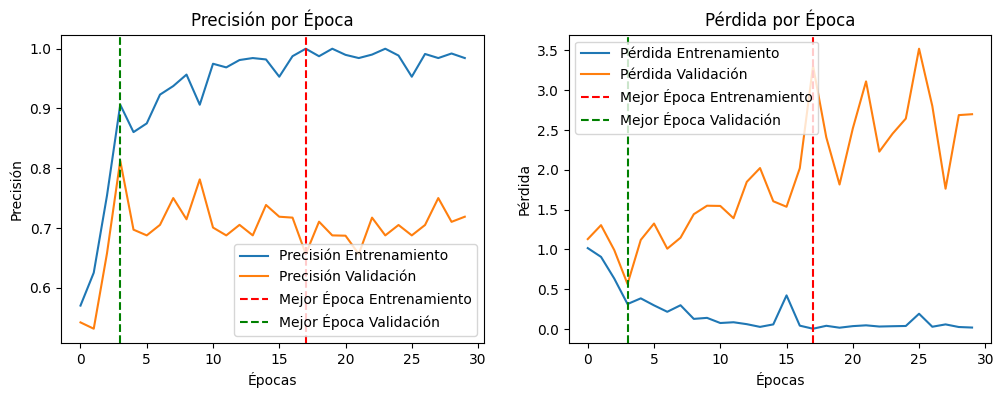

In [9]:
# Calcular la mejor época de entrenamiento y validación en base a la precisión
mejor_epoca_precision_entrenamiento = history.history['accuracy'].index(max(history.history['accuracy'])) + 1
mejor_epoca_precision_validacion = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Calcular la mejor época de entrenamiento y validación en base a la pérdida
mejor_epoca_perdida_entrenamiento = history.history['loss'].index(min(history.history['loss'])) + 1
mejor_epoca_perdida_validacion = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

# Mostrar los resultados
print('Mejor época de entrenamiento en base a la precisión: ', mejor_epoca_precision_entrenamiento-1)
print('Precisión: ', history.history['accuracy'][mejor_epoca_precision_entrenamiento-1])
print('Mejor época de validación en base a la precisión: ', mejor_epoca_precision_validacion-1)
print('Precisión: ', history.history['val_accuracy'][mejor_epoca_precision_validacion-1])
print('Mejor época de entrenamiento en base a la pérdida: ', mejor_epoca_perdida_entrenamiento-1)
print('Pérdida: ', history.history['loss'][mejor_epoca_perdida_entrenamiento-1])
print('Mejor época de validación en base a la pérdida: ', mejor_epoca_perdida_validacion-1)
print('Pérdida: ', history.history['val_loss'][mejor_epoca_perdida_validacion-1])

# Graficar precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.axvline(x=mejor_epoca_precision_entrenamiento-1, color='r', linestyle='--', label='Mejor Época Entrenamiento')
plt.axvline(x=mejor_epoca_precision_validacion-1, color='g', linestyle='--', label='Mejor Época Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.axvline(x=mejor_epoca_perdida_entrenamiento-1, color='r', linestyle='--', label='Mejor Época Entrenamiento')
plt.axvline(x=mejor_epoca_perdida_validacion-1, color='g', linestyle='--', label='Mejor Época Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

### Resultado
El modelo alcanzó una precisión de 100% y una pérdida de 0.4% en la fase de entrenamiento (época 18); sin embargo, durante la validación superó el 50%. Por eso, solo se procede a guardar los resultados del modelo para la época 4. Esto se puede deber a un sobreajuste o a que los hiperparámetros no están ajustados correctamente, así que en los próximos modelos se buscará revisar estos puntos.

In [35]:
# Entrenamiento del modelo
history = model.fit(
    data_entrenamiento, # Generador de datos de entrenamiento
    steps_per_epoch=pasos_entrenamiento, # Número de pasos por época
    epochs=4, # Número de épocas
    validation_data=data_validacion, # Generador de datos de validación
    validation_steps=pasos_validacion, # Número de pasos de validación
    #callbacks=callbacks
) # Número de pasos de validación

Epoch 1/4
562/562 ━━━━━━━━━━━━━━━━━━━━ 456s 810ms/step - accuracy: 0.4734 - loss: 1.2560 - val_accuracy: 0.5509 - val_loss: 1.0653
Epoch 2/4
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step - accuracy: 0.7031 - loss: 0.7576 - val_accuracy: 0.5000 - val_loss: 1.1155
Epoch 3/4
562/562 ━━━━━━━━━━━━━━━━━━━━ 234s 416ms/step - accuracy: 0.7173 - loss: 0.7179 - val_accuracy: 0.6895 - val_loss: 0.7939
Epoch 4/4
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 79us/step - accuracy: 0.7969 - loss: 0.4755 - val_accuracy: 0.6562 - val_loss: 0.7929


Mejor época de entrenamiento en base a la precisión:  4
Precisión:  0.796875
Mejor época de validación en base a la precisión:  3
Precisión:  0.6895161271095276
Mejor época de entrenamiento en base a la pérdida:  4
Pérdida:  0.47550588846206665
Mejor época de validación en base a la pérdida:  4
Pérdida:  0.7929013967514038


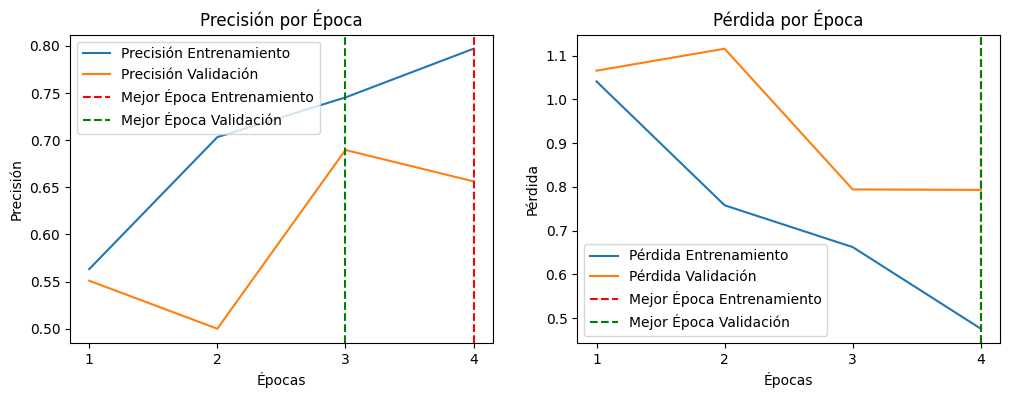

In [38]:
# Calcular la mejor época de entrenamiento y validación en base a la precisión
mejor_epoca_precision_entrenamiento = history.history['accuracy'].index(max(history.history['accuracy']))
mejor_epoca_precision_validacion = history.history['val_accuracy'].index(max(history.history['val_accuracy']))

# Calcular la mejor época de entrenamiento y validación en base a la pérdida
mejor_epoca_perdida_entrenamiento = history.history['loss'].index(min(history.history['loss']))
mejor_epoca_perdida_validacion = history.history['val_loss'].index(min(history.history['val_loss']))

# Mostrar los resultados
print('Mejor época de entrenamiento en base a la precisión: ', mejor_epoca_precision_entrenamiento + 1)
print('Precisión: ', history.history['accuracy'][mejor_epoca_precision_entrenamiento])
print('Mejor época de validación en base a la precisión: ', mejor_epoca_precision_validacion + 1)
print('Precisión: ', history.history['val_accuracy'][mejor_epoca_precision_validacion])
print('Mejor época de entrenamiento en base a la pérdida: ', mejor_epoca_perdida_entrenamiento + 1)
print('Pérdida: ', history.history['loss'][mejor_epoca_perdida_entrenamiento])
print('Mejor época de validación en base a la pérdida: ', mejor_epoca_perdida_validacion + 1)
print('Pérdida: ', history.history['val_loss'][mejor_epoca_perdida_validacion])

# Graficar precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.axvline(x=mejor_epoca_precision_entrenamiento, color='r', linestyle='--', label='Mejor Época Entrenamiento')
plt.axvline(x=mejor_epoca_precision_validacion, color='g', linestyle='--', label='Mejor Época Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(history.history['accuracy'])), range(1, len(history.history['accuracy']) + 1))

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.axvline(x=mejor_epoca_perdida_entrenamiento, color='r', linestyle='--', label='Mejor Época Entrenamiento')
plt.axvline(x=mejor_epoca_perdida_validacion, color='g', linestyle='--', label='Mejor Época Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(history.history['loss'])), range(1, len(history.history['loss']) + 1))

plt.show()

In [39]:
# Guardado del modelo
model.save(r'C:\Users\carolina\Documents\Proyectos_programacion\SIRA\backend\models\sira_modelo3.h5')

# Guardado del modelo en el formato nativo de Keras
model.save(r'C:\Users\carolina\Documents\Proyectos_programacion\SIRA\backend\models\sira_modelo3.keras')